# [E-06]Movie Review Text Analysis ( 영화 리뷰 텍스트 분석 )
_____

## 목차
### 1. 개요
    1.1 들어가기에 앞서
    1.2 루브릭 평가기준
### 2. 프로젝트: 네이버 영화리뷰 감성분석 도전하기 - 데이터
    2.1 데이터 준비하기
    2.2 데이터 로더 구성
    2.3 데이터 분석 및 가공
### 3. 프로젝트: 네이버 영화리뷰 감성분석 도전하기 - 모델
    3.1 Simple RNN 레이어
    3.2 LSTM 레이어
    3.3 GRU 레이어
    3.4 1-D CNN 레이어
    3.5 GlobalMaxPooling1D 레이어
### 4. 프로젝트: 네이버 영화리뷰 감성분석 도전하기 - 임베딩
    4.1 학습된 Embedding 레이어 분석
    4.2 한국어 Word2Vec 임베딩 활용한 성능 개선
### 5. 결론
    5.1 결론
    5.2 참조
    5.3 회고

-----

## 1. 개요
### 1.1 들어가기에 앞서

___

#### 학습 목표
- 텍스트 데이터를 머신러닝 입출력용 수치데이터로 변환하는 과정을 이해한다.
- RNN의 특징을 이해하고 시퀀셜한 데이터를 다루는 방법을 이해한다.
- 1-D CNN으로도 텍스트를 처리할 수 있음을 이해한다.
- IMDB와 네이버 영화리뷰 데이터셋을 이용한 영화리뷰 감성 분류 실습을 진행한다.

___ 

#### 노드 Questions
##### Q1. 텍스트 데이터에서만 얻을 수 있는 유용한 정보는 무엇인가? 그 유용성은 텍스트 데이터의 어떤 특징으로부터 비롯되는 것인가?
- SNS에서는 광범위한 분량의 텍스트 데이터를 쉽게 얻을 수 있는데, 이 데이터는 소비자들의 개인적인 그리고 감성적인 반응이 직접 담겨 있기에 실시간 트렌드나 유행을 빠르게 반영하는 데이터이다.

##### Q2. 텍스트 감성분석 접근법을 크게 2가지
- 기계학습 기반 접근법
- 감성사전 기반 접근법

##### Q3. 사전 기반의 감성분석이 기계학습 기반 접근법 대비 가지는 한계점
- 감성사전을 구축할 때 해당 분야에서 사용되는 대부분의 감성어를 포함하고 있어야 한다는 점
- 분석 대상에 따라 단어의 감성 점수가 달라질 수 있다는 점
- 단순 긍부정을 넘어서 긍부정의 원인이 되는 대상 속성 기반의 감성 분석이 어렵다는 점

##### Q4. 감성분석 등 텍스트 분류 모델이 다른 데이터분석 업무에 어떤 도움을 줄 수 있는가?
- 일반적인 데이터분석 업무는 범주화가 잘 된 정형데이터를 필요로 하는데, 이런 데이터를 큰 규모로 구축하기 위해서는 많은 비용이 든다. 그러나 쉽게 구할 수 있는 비정형데이터인 텍스트에 감성분석 기법을 적용하면 텍스트를 정형데이터로 가공하여 유용한 의사결정 보조자료로 활용할 수 있게 된다.

##### Q5. 라벨링 비용이 많이 드는 머신러닝 기반 감성분석의 비용을 절감하면서 정확도를 크게 향상시킬 수 있는 자연어처리 기법에는 무엇이 있는가?
- 워드 임베딩 기법

___

#### 이론 정리

###### 감성분석
- 감성분석이란 SNS, 소셜미디어 등에서 어떤 주제에 대한 주관적인 감정, 태도, 의견 등의 정보를 분석하는 과정

###### RNN(Recurrent Neural Network)
- 순환 신경망이라고 불리는 RNN은 은닉 계층 안에 하나 이상의 순환 계층을 갖는 신경망을 의미
- 주로 자연어 처리에 활용되며, 텍스트 데이터를 다루는 데 주로 사용되는 딥러닝 모델
- 시퀀스(Sequence) 형태의 데이터를 처리하기에 최적인 모델

##### Simple RNN 레이어 
- 가장 간단한 형태의 RNN의 레이어 

##### LSTM 레이어 
- 가장 널리 쓰이는 RNN 레이어
- 장기 의존성 문제 해결

##### GRU 레이어 
- LSTM 레이어와 비슷하나, 더 간단한 구조로서 계산상 효율적인 RNN 레이어
- 특정 문제에서 주로 사용됨

##### 임베딩 레이어 
- 임베딩 레이어는 주로 자연어 처리에서 사용되고, 자연어를 수치화된 정보로 바꾸기 위한 레이어

##### RNN의 문제점  (장기 의존성)
- RNN에서는 공통적으로 입력 데이터가 커질수록, 학습 능력이 저하되는 단점이 있다. 이렇게 된다면 입력 데이터와 출력 데이터 사이의 길이거 멀어져 연관 관계가 줄어들게 된다. 이를 장기 의존성 문제라고 하는데, 이를 보완하기 위하여 셀의 상태가 존재한다는 특징을 이용한 LSTM 레이어로 장기 의존성 문제를 해결


###### CNN(Convolutional Neural Network)
- 컨볼루션 신경망은 주로 이미지를 사용하는 딥러닝 모델
- 이미지 외에도 음성, 텍스트 등의 데이터에도 사용이 가능
- CNN 계열은 RNN 계열보다 병렬처리가 효율적이기 때문에 학습 속도도 훨씬 빠르게 진행

###### 전이학습
- 특정 문제를 풀기 위해 학습한 모델을 다른 문제 푸는데 재사용하는 기법

##### 워드 임베딩
- 텍스트를 구성하는 하나의 단어를 유의미한 수치의 벡터로 바꿔주는 방법

##### word2vec
- 구글에서 개발한 자연어 처리를 위한 인공신경망 기반의 알고리즘이고, 워드 임베딩 방법 중 하나

##### Gensim
- Python 기반의 Text mining 라이브러리

____

## 1.2 루브릭 평가기준
평가문항|상세기준
-|-
1. 다양한 방법으로 Text Classification 태스크를 성공적으로 구현하였다.| 3가지 이상의 모델이 성공적으로 시도됨
2. gensim을 활용하여 자체학습된 혹은 사전학습된 임베딩 레이어를 분석하였다. | gensim의 유사단어 찾기를 활용하여 자체학습한 임베딩과 사전학습 임베딩을 적절히 분석함
3. 한국어 Word2Vec을 활용하여 가시적인 성능향상을 달성했다. | 네이버 영화리뷰 데이터 감성분석 정확도를 85% 이상 달성함

----

## 2. 프로젝트: 네이버 영화리뷰 감성분석 도전하기 - 데이터
### 2.1 데이터 준비하기

In [1]:
# 필요한 모듈 import
import matplotlib.pyplot as plt
import os
from gensim.models.keyedvectors import Word2VecKeyedVectors
import gensim
from gensim.models import KeyedVectors
from tensorflow.keras.initializers import Constant
import pandas as pd
import tensorflow as tf
from konlpy.tag import Mecab
import numpy as np
from collections import Counter

# 데이터 읽어오기
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


____

### 2.2 데이터 로더 구성

In [2]:
tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any')  
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data) 

- drop_duplicates()함수는 방금 duplicated()함수에서 True를 반환했던 row를 제거해주는 역할
- dropna()함수는 결측치(누락데이터) 제거해주는 역할
- Mecab tokenizer를 이용해 사전을 구축하여 학습을 진행하였고 성능 결과를 공유


In [3]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [4]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수이다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수이다.
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수이다.
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수이다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

___

### 2.3 데이터 분석 및 가공

In [5]:
#실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있다다.  
word_to_index = {k:(v+1) for k,v in word_to_index.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있다.
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word[0] = "<PAD>"
index_to_word[1] = "<BOS>"
index_to_word[2] = "<UNK>"
index_to_word[3] = "<UNUSED>"

index_to_word = {index:word for word, index in word_to_index.items()}

print(index_to_word[1])     # '<BOS>' 가 출력됨

<BOS>


In [6]:
total_data_text = list(X_train) + list(X_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

문장길이 평균 :  15.96940191154864
문장길이 최대 :  116
문장길이 표준편차 :  12.843571191092


In [7]:
# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

pad_sequences maxlen :  41
전체 문장의 0.9342988343341575%가 maxlen 설정값 이내에 포함됩니다. 


- pad_sequences 를 통해 데이터셋 상의 문자의 길이를 통일하는 것
- 문장 최대 길이 maxlen의 값 설정도 전체 모델 성능에 영향을 미침
- padding 방식을 문장 뒤쪽('post')과 앞쪽('pre') 중 어느 쪽으로 하느냐에 따라 RNN을 이용한 딥러닝 적용 시 성능 차이가 발생한다.

In [8]:
# padding 방식을 문장 뒤,앞쪽 모두 적용했을 때 RNN학습
# pre가 유리

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', # 혹은 'pre'
                                                        maxlen=maxlen)
    
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre', # 혹은 'pre'
                                                       maxlen=maxlen)

print(X_train.shape)

(146182, 41)


In [9]:
# validation set 30000건 분리
X_val = X_train[:30000]   
y_val = y_train[:30000]

# validation set을 제외한 나머지
partial_X_train = X_train[30000:]  
partial_y_train = y_train[30000:]

print(partial_X_train.shape)
print(partial_y_train.shape)

(116182, 41)
(116182,)


- 일반적으로 대략 Training set : Validation set : Test sets = 60 : 20 : 20 비율로 사용한다고 하여, 훈련용셋에서 검증셋으로 30000건 분리

---
## 3. 프로젝트: 네이버 영화리뷰 감성분석 도전하기 - 모델

#### 모델 구성 > 모델 훈련 > Loss, Accuracy 그래프 시각화

### 3.1 Simple RNN 레이어

In [10]:
vocab_size = 10000    # 어휘 사전의 크기(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.SimpleRNN(32))  
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                1568      
_________________________________________________________________
dense (Dense)                (None, 8)                 264       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 161,841
Trainable params: 161,841
Non-trainable params: 0
_________________________________________________________________


- 가장 쉽게 쓰이는 RNN인 Simple RNN 레이어

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=5  # 기존 epoch 10 -> 5

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/5
227/227 [==============================] - 10s 35ms/step - loss: 0.4828 - accuracy: 0.7603 - val_loss: 0.3556 - val_accuracy: 0.8462
Epoch 2/5
227/227 [==============================] - 8s 35ms/step - loss: 0.3349 - accuracy: 0.8572 - val_loss: 0.3515 - val_accuracy: 0.8474
Epoch 3/5
227/227 [==============================] - 8s 35ms/step - loss: 0.3091 - accuracy: 0.8705 - val_loss: 0.3505 - val_accuracy: 0.8501
Epoch 4/5
227/227 [==============================] - 8s 35ms/step - loss: 0.2898 - accuracy: 0.8800 - val_loss: 0.3592 - val_accuracy: 0.8474
Epoch 5/5
227/227 [==============================] - 8s 35ms/step - loss: 0.2662 - accuracy: 0.8924 - val_loss: 0.3775 - val_accuracy: 0.8415


In [12]:
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 7s - loss: 0.3857 - accuracy: 0.8382
[0.3857087790966034, 0.838151216506958]


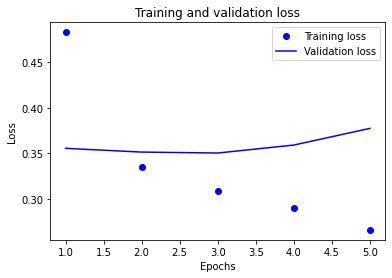

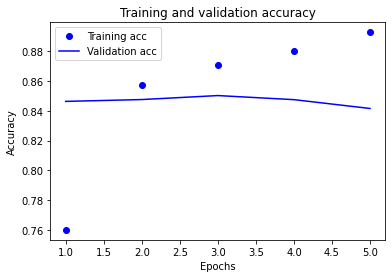

In [13]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- Epochs=10 으로 두고 학습시켰을 때, Training과 validation의 그래프가 epochs=2 부터 점차 이격이 발생하고, val loss가 3~5 epoch부터 점차 증가하는 형태를 보임 그래서 Epochs를 5로 두고 학습 진행

---

### 3.2 LSTM 레이어

In [14]:
vocab_size = 10000    # 어휘 사전의 크기(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(32))  
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                6272      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 166,545
Trainable params: 166,545
Non-trainable params: 0
_________________________________________________________________


- 가장 널리 쓰이는 RNN인 LSTM 레이어

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=5  

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/5
227/227 [==============================] - 4s 7ms/step - loss: 0.5120 - accuracy: 0.7560 - val_loss: 0.3656 - val_accuracy: 0.8416
Epoch 2/5
227/227 [==============================] - 1s 5ms/step - loss: 0.3435 - accuracy: 0.8538 - val_loss: 0.3510 - val_accuracy: 0.8491
Epoch 3/5
227/227 [==============================] - 1s 5ms/step - loss: 0.3208 - accuracy: 0.8659 - val_loss: 0.3478 - val_accuracy: 0.8509
Epoch 4/5
227/227 [==============================] - 1s 5ms/step - loss: 0.3096 - accuracy: 0.8711 - val_loss: 0.3483 - val_accuracy: 0.8516
Epoch 5/5
227/227 [==============================] - 1s 6ms/step - loss: 0.2991 - accuracy: 0.8763 - val_loss: 0.3534 - val_accuracy: 0.8519


In [16]:
results = model.evaluate(X_test, y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.3646 - accuracy: 0.8446
[0.3646473288536072, 0.8445999622344971]


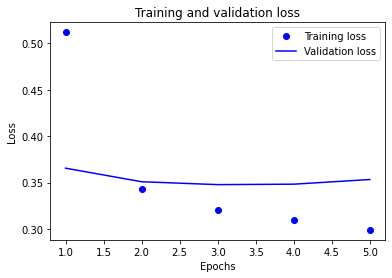

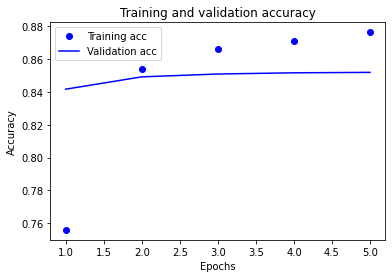

In [17]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---

### 3.3 GRU 레이어

In [18]:
vocab_size = 10000    # 어휘 사전의 크기(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GRU(32))   
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
gru (GRU)                    (None, 32)                4800      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 165,073
Trainable params: 165,073
Non-trainable params: 0
_________________________________________________________________


- LSTM 레이어와 비슷하나, 더 간단한 구조이고 빠른 GRU 레이어를 사용해보았다.

In [19]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=5  

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/5
227/227 [==============================] - 3s 8ms/step - loss: 0.4660 - accuracy: 0.7819 - val_loss: 0.3528 - val_accuracy: 0.8481
Epoch 2/5
227/227 [==============================] - 1s 5ms/step - loss: 0.3383 - accuracy: 0.8573 - val_loss: 0.3480 - val_accuracy: 0.8495
Epoch 3/5
227/227 [==============================] - 1s 6ms/step - loss: 0.3188 - accuracy: 0.8677 - val_loss: 0.3482 - val_accuracy: 0.8486
Epoch 4/5
227/227 [==============================] - 1s 5ms/step - loss: 0.3092 - accuracy: 0.8723 - val_loss: 0.3515 - val_accuracy: 0.8489
Epoch 5/5
227/227 [==============================] - 1s 5ms/step - loss: 0.3008 - accuracy: 0.8756 - val_loss: 0.3530 - val_accuracy: 0.8507


In [20]:
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.3630 - accuracy: 0.8435
[0.36296337842941284, 0.8434810638427734]


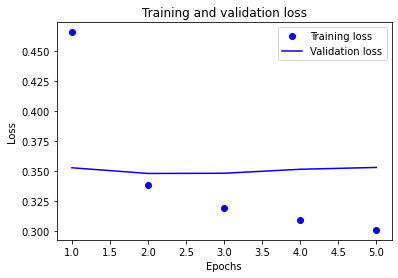

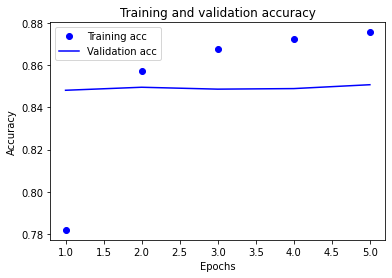

In [21]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---

### 3.4 1-D CNN 레이어

In [22]:
vocab_size = 10000  
word_vector_dim = 16  

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          1808      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=5 

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/5
227/227 [==============================] - 3s 6ms/step - loss: 0.4819 - accuracy: 0.7640 - val_loss: 0.3549 - val_accuracy: 0.8441
Epoch 2/5
227/227 [==============================] - 1s 5ms/step - loss: 0.3291 - accuracy: 0.8606 - val_loss: 0.3415 - val_accuracy: 0.8514
Epoch 3/5
227/227 [==============================] - 1s 5ms/step - loss: 0.2954 - accuracy: 0.8778 - val_loss: 0.3375 - val_accuracy: 0.8549
Epoch 4/5
227/227 [==============================] - 1s 5ms/step - loss: 0.2655 - accuracy: 0.8927 - val_loss: 0.3449 - val_accuracy: 0.8521
Epoch 5/5
227/227 [==============================] - 1s 5ms/step - loss: 0.2345 - accuracy: 0.9086 - val_loss: 0.3554 - val_accuracy: 0.8521


In [24]:
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.3658 - accuracy: 0.8471
[0.36584463715553284, 0.8470614552497864]


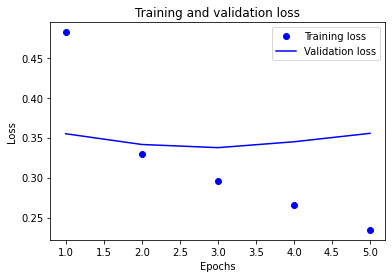

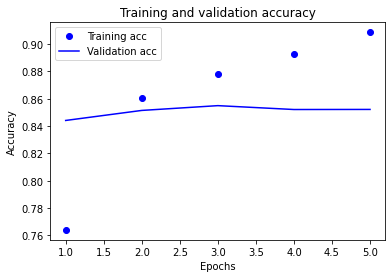

In [25]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---

### 3.5 GlobalMaxPooling1D 레이어

In [26]:
vocab_size = 10000 
word_vector_dim = 16  

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 160,145
Trainable params: 160,145
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=5 

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/5
227/227 [==============================] - 1s 4ms/step - loss: 0.6063 - accuracy: 0.7194 - val_loss: 0.4748 - val_accuracy: 0.8184
Epoch 2/5
227/227 [==============================] - 1s 3ms/step - loss: 0.4074 - accuracy: 0.8358 - val_loss: 0.3747 - val_accuracy: 0.8376
Epoch 3/5
227/227 [==============================] - 1s 3ms/step - loss: 0.3407 - accuracy: 0.8586 - val_loss: 0.3557 - val_accuracy: 0.8441
Epoch 4/5
227/227 [==============================] - 1s 3ms/step - loss: 0.3092 - accuracy: 0.8722 - val_loss: 0.3517 - val_accuracy: 0.8464
Epoch 5/5
227/227 [==============================] - 1s 3ms/step - loss: 0.2872 - accuracy: 0.8824 - val_loss: 0.3543 - val_accuracy: 0.8472


In [28]:
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 2s - loss: 0.3660 - accuracy: 0.8419
[0.3660111725330353, 0.8419350385665894]


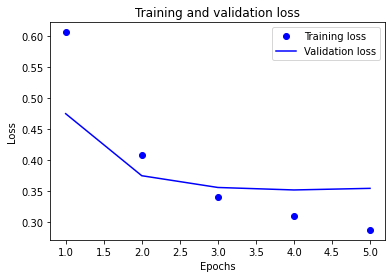

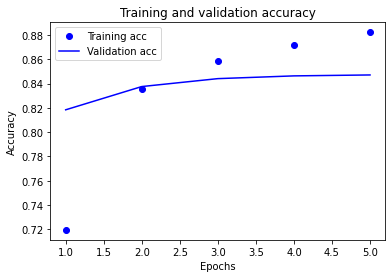

In [29]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---

## 4. 프로젝트: 네이버 영화리뷰 감성분석 도전하기 - 임베딩
### 4.1 학습된 Embedding 레이어 분석

In [30]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [31]:
# 학습한 Embedding 파라미터를 파일에 써서 저장 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 쓴다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [32]:
word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['영화']
vector

array([-0.12789302, -0.0762958 , -0.04555757, -0.01971775, -0.14041793,
       -0.12590307, -0.11043759, -0.12743825, -0.13111725, -0.0469883 ,
       -0.1087292 , -0.10507307, -0.10879169, -0.03339495, -0.05674127,
       -0.11626739], dtype=float32)

In [33]:
word_vectors.similar_by_word('한국')

[('조', 0.8897230625152588),
 ('열린', 0.8833246231079102),
 ('그땐', 0.879989504814148),
 ('낚일', 0.8705426454544067),
 ('정보', 0.8577144742012024),
 ('묻혀', 0.8555874824523926),
 ('품달', 0.8545593023300171),
 ('빠져들', 0.8502991199493408),
 ('나갈', 0.8492895364761353),
 ('넌', 0.8460018038749695)]

- 관계가 유사할 수도 있으나, '한국' 이라는 단어와는 크게 연관성이 깊어보이지 않은 단어들이 출력되고 정확도도 높게 측정되었다.

---

### 4.2 한국어 Word2Vec 임베딩 활용한 성능 개선

In [34]:
word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/ko.bin'
word2vec = gensim.models.Word2Vec.load(word2vec_path)
vector = word2vec["영화"]
vector.shape

/tmp/ipykernel_6813/10629537.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vector = word2vec["영화"]


(200,)

In [35]:
word2vec.similar_by_word("한국")

/tmp/ipykernel_6813/1722983755.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  word2vec.similar_by_word("한국")


[('대한민국', 0.6662065982818604),
 ('우리나라', 0.6312342882156372),
 ('동양', 0.5589770078659058),
 ('미국', 0.5445788502693176),
 ('동북아', 0.5333539247512817),
 ('국내', 0.5278753638267517),
 ('일본', 0.5174024105072021),
 ('아세아', 0.5054686069488525),
 ('중국', 0.5036405920982361),
 ('민간', 0.5017623901367188)]

- word2vec embedding을 활용한 결과로 정확도는 낮게 측정되었지만, 비교적 연관성이 유사한 단어들이 표출되었다.

In [41]:
vocab_size = 10000    
word_vector_dim = 200  
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)


for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

/tmp/ipykernel_6813/640500515.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if index_to_word[i] in word2vec:
/tmp/ipykernel_6813/640500515.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_matrix[i] = word2vec[index_to_word[i]]


In [37]:
vocab_size = 10000   
word_vector_dim = 200  

# 모델 구성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  
                                 input_length=maxlen, 
                                 trainable=True))   
model.add(tf.keras.layers.GRU(64))  
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 41, 200)           2000000   
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                51072     
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 2,051,601
Trainable params: 2,051,601
Non-trainable params: 0
_________________________________________________________________


- 기존에 5개의 레이어에서 epochs = 10 으로 했었을 때 가장 높은 정확도를 보여주었던, GRU레이어를 사용했다.

In [38]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=5  

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/5
227/227 [==============================] - 4s 9ms/step - loss: 0.4883 - accuracy: 0.7549 - val_loss: 0.4202 - val_accuracy: 0.8054
Epoch 2/5
227/227 [==============================] - 2s 7ms/step - loss: 0.3486 - accuracy: 0.8484 - val_loss: 0.3484 - val_accuracy: 0.8478
Epoch 3/5
227/227 [==============================] - 2s 8ms/step - loss: 0.3038 - accuracy: 0.8712 - val_loss: 0.3326 - val_accuracy: 0.8556
Epoch 4/5
227/227 [==============================] - 2s 7ms/step - loss: 0.2762 - accuracy: 0.8857 - val_loss: 0.3344 - val_accuracy: 0.8581
Epoch 5/5
227/227 [==============================] - 2s 8ms/step - loss: 0.2534 - accuracy: 0.8965 - val_loss: 0.3336 - val_accuracy: 0.8592


In [39]:
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.3468 - accuracy: 0.8513
[0.3467695415019989, 0.851272463798523]


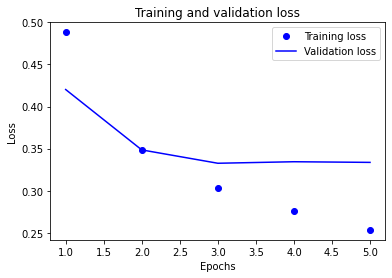

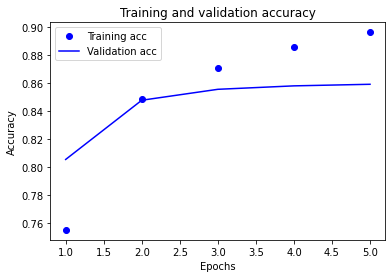

In [40]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


----

## 5. 결론
### 5.1 결론 

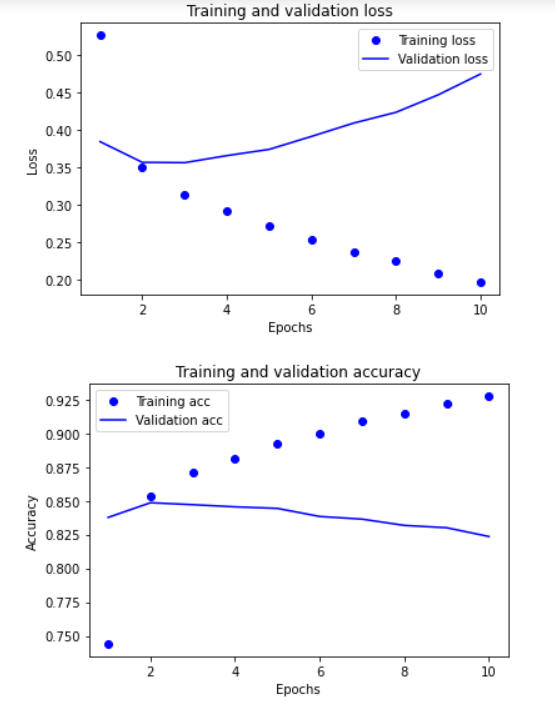

처음에는 위 사진 그래프처럼 10에포크로 5개 레이어를 학습했었다.

이때 accuracy가 모두 80~85 사이에 분포해 있었고, loss와 accuracy 그래프 형태도 유사하게 그려졌다. 

그러나 10 에포크로 학습을 돌렸을 때 특이점이 있었다면, 

- 2 에포크부터 정확도가 급격히 올라갔고, loss는 급격하게 떨어졌다.

- 4~5 에포크부터 val_loss가 급격히 증가하기 시작했고, 덩달아 val_accuracy는 떨어지기 시작했다.


그렇기에 **너무 많은 학습을 시키면 훈련 데이터에 편향되어, 오버피팅이 일어나는 것**이라 생각했고, 에포크를 10 -> 5로 조절하여 학습시켰다.

---

기존에 학습된 Embedding 레이어를 분석했을 때 '한국'이라는 단어의 유사단어의 정확도는 80~89%로 아주 높은 정확도를 보였다.

그러나 문제점이 있었다면 이 단어를 유추했을 때 유사성이 깊지 않은 단어들이 출력되었다는 점이다.

반면, 한국어 Word2Vec 임베딩 활용했을 때는 정확도는 크게 높지 않았지만, '한국'이라는 단어와 유사한 단어들이 출력될 수 있었다.

또한 모델 학습에서는 하이퍼파라미터를 크게 조정하지 않았음에도 **85%** 이상의 성공적인 정확도를 볼 수 있었다.

---

### 5.2 참조
- 결측치 제거, 중복데이터 제거: https://yganalyst.github.io/data_handling/Pd_6/#13-%EA%B2%B0%EC%B8%A1%EC%B9%98%EB%88%84%EB%9D%BD%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A0%9C%EA%B1%B0--dropna

- 한국어 토크나이저: https://github.com/changwng/BERT-MECAB-Korean-Model

- ann,dnn: https://ebbnflow.tistory.com/119

- 한국어 자연어처리는 왜 어려울까?: https://fastcampus.co.kr/story_article_nlp

- SimpleRNN, gru: https://davinci-ai.tistory.com/30

- Training set, Validation set, Test sets 비율: https://modern-manual.tistory.com/19

- word2vec: https://shuuki4.wordpress.com/2016/01/27/word2vec-%EA%B4%80%EB%A0%A8-%EC%9D%B4%EB%A1%A0-%EC%A0%95%EB%A6%AC/

- gensim 오류: https://shate-programming.tistory.com/33


---

### 5.3 회고

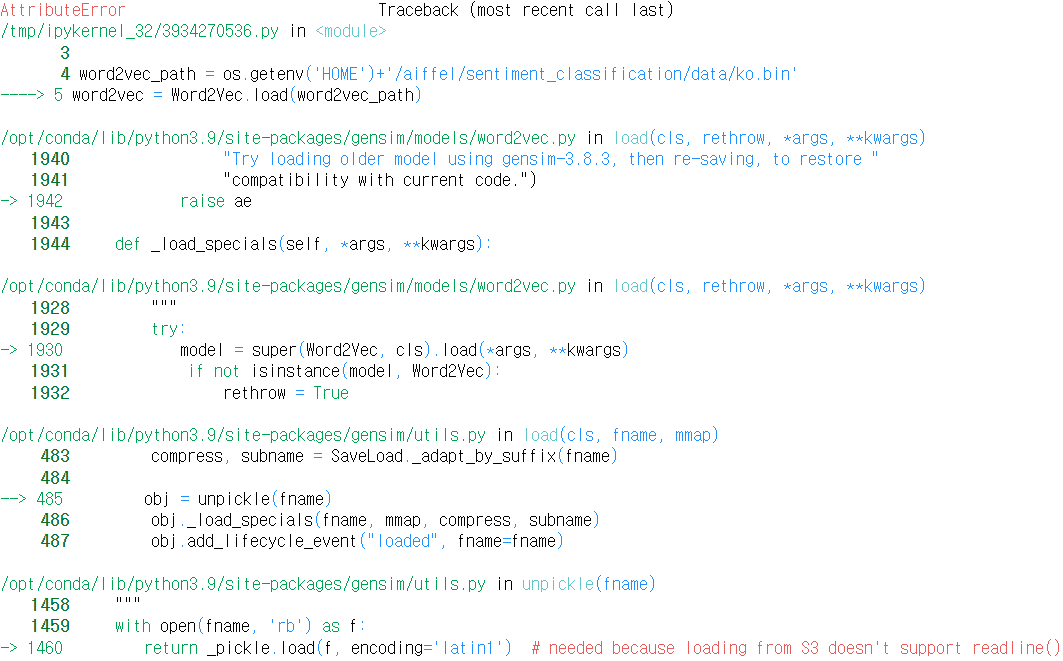




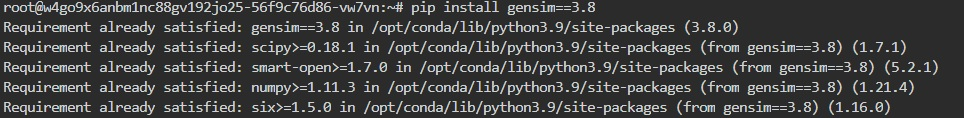


#### 나를 괴롭혔던 Gensim 오류
> 한국어 Word2Vec 임베딩을 활용하여 성능 개선을 하는 부분에서 위와 같이 오류가 지속되었다. 노드에 나온 내용처럼 버전을 바꾸면 해결이 된다길래, 참고에 적은 내용을 참조하여 버전을 낮추었더니 또 다른 오류가 발생했었다. 또 한국어 Word2vec을 활용하려면 Gensim 버전이 3.8.0 이상이어야 된다고 했다. 위 두번째 사진처럼 버전을 다시 맞추고 주피터노트북에서 버전을 출력해보았는데, 버전의 변동이 전혀 없었다. 주변에서 셧다운을 해야 버전이 적용된다길래 주피터를 종료했다가 다시 시작해도 버전의 변동이 없었다. 다시 알고보니 주피터 셧다운은 주피터를 껐다 키는 것이 아니라, 메인에서 셧다운을 클릭해주어야 한다는 사실이었다. 생각보다 어렵지 않던 내용을 혼자 끙끙 앓으며 고민했다는 것이 황당했다. 물론 Gensim을 처음 사용하여 낯설긴 했으나, 기본에 충실해야하는 이유가 무엇인지 오늘 한 번 더 깨닫게 되었다.

#### 모델에 대한 개념 미숙
> 본 프로젝트에서 기존 노드에 있던 LSTM,1-D CNN, GlobalMaxPooling1D를 포함하여 SimpleRNN과 GRU 모델을 사용했다. 원래는 기존 모델 3개로만 프로젝트를 진행하려 했으나, 우연히 참고하던 사이트에서 SimpleRNN과 GRU 모델에 대한 내용이 적혀있어 추가로 두 레이어를 사용했다. 해당 참고 자료에서의 코드 작성법은 LSTM 모델을 그냥 SimpleRNN과 GRU로 바꿔주면 된다길래, 이름만 바꾸어 코드를 적용했다. 또 word2vec 임베딩을 활용할 때 그나마 점수가 가장 높게 나왔던 LSTM과 GRU중 GRU를 코드로 사용했다. 사실 공부를 하며 이 레이어들에 대한 형태만 알 수 있었지, 어떠한 원리로 학습 결과값이 변했는 지에 대해 이유는 솔직하게 모르겠다. 지금 프로젝트에서 확인한 것만으로는 Simple RNN은 그냥 간단한 RNN이고, GRU와 LSTM은 비슷한 구조이지만 상황에 따라 사용되는 점이 다른 부분? 말고는 아직 모르겠다.

#### 자연어 처리에 대한 생각
> NLP 노드가 다른 노드들에 비해 난이도가 있어 보이는 것이 사실이다. 제대로 이해하지도 못한 채로 찝찝하게 노드를 작성하는 기분이 든달까. 코드의 원리를 이해하고 넘어가야 하는데 '되기만 하면 된다.' 라는 생각으로 이번 프로젝트를 진행했던 것 같다. 이런 문제점을 해결하기 위해서 자연어 처리에 대해 흥미를 가져야할 필요를 느꼈다. 

#### 더 배워보고 싶은 것
> Word2Vec를 활용하여 단어간에 벡터를 이용해 유사도를 확인할 수 있어 신기했다.다음에는 Word2Vec 말고, 임베딩 기법을 사용한 Bert 모델이나 다른 모델들을 사용해보며 각 모델의 장, 단점을 통해 각 모델들의 한계점이라던지, 어느 상황에 어느 모델들을 사용하는 것이 좋을지 익히고 싶은 생각이 들었다. (사실 Bert 모델을 사용해보려고 찾아보았으나, 아직 쓸 줄 전혀 모르겠다.)